# Logistic Regression

## Visualize the data

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [118]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
positive.head()

,Exam1,Exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


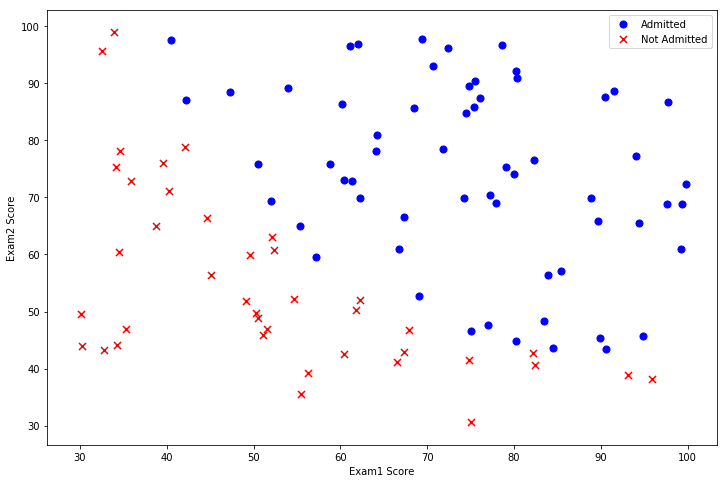

In [119]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

## Sigmoid Function

Hypothesis:

$h_{\theta }=g\left ( \theta^{T}x \right )$

g is sigmoid function, defined as:

$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$

So hypothesis is:

${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$


In [120]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

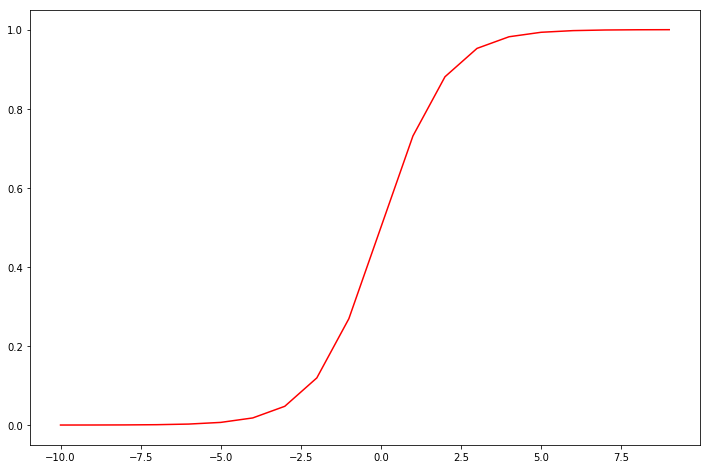

In [121]:
# plot sigmoid function.
num = np.arange(-10, 10, 1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(num, sigmoid(num), 'r')
plt.show()

## Cost Function

Cost function in logistic regression:

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}Cost{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right),{{y}^{(i)}} \right)}}}$

$Cost{{{\left( {{h}_{\theta }}\left( {{x}} \right),{{y}} \right)}}}=\begin{cases}
 & -\log \left( {{h}_{\theta }}\left( {{x}} \right) \right)     \text{ if } y=1 \\ 
 & -\log \left( 1 - {{h}_{\theta }}\left( {{x}} \right) \right) \text{ if } y=0 
\end{cases}$

this can be simplified to:

$Cost{{{\left( {{h}_{\theta }}\left( {{x}} \right),{{y}} \right)}}}={-{{y}}\log \left( {{h}_{\theta }}\left( {{x}} \right) \right)-\left( 1-{{y}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}} \right) \right)}$

So cost function is:

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$



In [122]:
def compute_cost(X, y, theta):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y, np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)

In [123]:
# add one columns.
data.insert(0, "Ones", 1)

# set X(training data)and y(target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to metrices and initialize theta.
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.zeros(3)

X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [124]:
compute_cost(X, y, theta)

0.6931471805599453

## Gradient Descent

$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$

In [125]:
# similar as linear regression.
def gradient_descent(X, y, theta, alpha, iters):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    theta_temp = np.matrix(np.zeros(theta.shape))

    # params is number of theta
    params = theta.ravel().shape[1]

    # cost is one dimension array of size iters that stores cost value of each iteration.
    cost = np.zeros(iters)

    for i in range(iters):
        # h(x)-y is fixed in each iteration.
        error = sigmoid(X*theta.T) - y

        for j in range(params):
            # calulate sum term element
            term = np.multiply(error, X[:,j])
            # calulate new theta
            theta_temp[0,j] = theta[0,j] - (alpha/len(X))*sum(term)

        theta = theta_temp
        cost[i] = compute_cost(X, y, theta)

    return theta, cost

In [140]:
alpha = 0.005
iters = 5000
theta, cost = gradient_descent(X, y, theta, alpha, iters)
theta

matrix([[-8.37564306,  0.11202195, -0.06020274]])

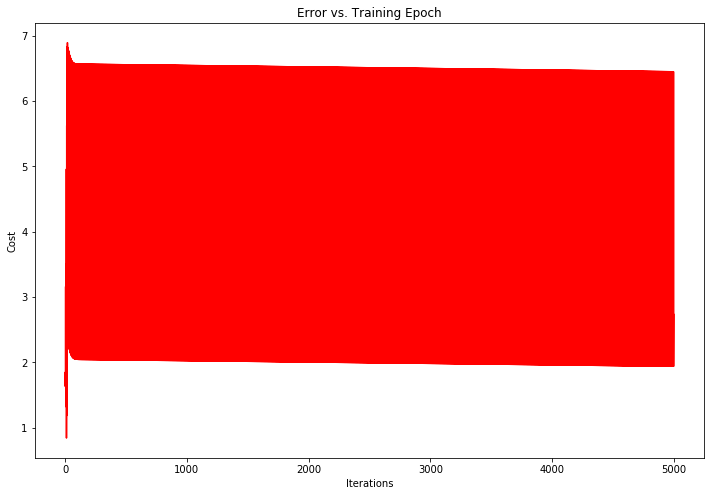

In [141]:
# plot cost decrease at each iterations
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### It is hard to select approriate alpha and iters to converge.

In [128]:
def gradient(X, y, theta):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    # params is number of theta
    params = theta.ravel().shape[1]
    grad = np.zeros(params)

    error = sigmoid(X*theta.T) - y

    for j in range(params):
        # calulate sum term element
        term = np.multiply(error, X[:,j])
        grad[j] = sum(term)/len(X)

    return grad

In [129]:
gradient(X, y, theta)

array([ 0.39019858, 20.48061353, 20.93419386])